# Viral Tweets

In this project, I are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. I am going to look at features of a tweet that are most closely linked to its popularity. Off the bat I think maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

From the json some of these features are dictionaries. For example, the feature `"user"` is a dictionary. I am also going to use some of the information found in these sub-dictionaries. Print `all_tweets.loc[0]["user"]` to see what the `"user"` feature looks like.

In [1]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

#Print the user here and the user's location here.
print(all_tweets.loc[0]['user']['location'])


11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
Waterloo, Iowa


# Defining Viral Tweets

Defining if a tweet has gone viral or not is something that is defined in this dataset, so this is something I have to extrapolate. I'm defining virality by number of retweets and this can be found using the feature `"retweet_count"`. There's lots of ways to define virality, but in this instance I'm going to be defining viral tweets as ones above the median number of retweets in the data set.

In [2]:
import numpy as np

viral = all_tweets['retweet_count'].median()
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > viral, 1, 0)
all_tweets['is_viral'].value_counts()

0    5562
1    5537
Name: is_viral, dtype: int64

# Making Features

Now that I've created a label for every tweet in our dataset, I want to start doing feature extraction. I can create new columns in my dataset to represent these features.

In [3]:
#Defining a function to find the average number of letters in each word
def averageLen(lst):
    lengths = [len(i) for i in lst]
    return 0 if len(lengths) == 0 else (float(sum(lengths)) / len(lengths)) 

In [4]:
#Making a bunch of new features I thought might be important. Extracting tweet length, follower count, friends count,
#number of hashtags, number of links, number of words, and average numbers of letter in each word
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis =1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis =1)
all_tweets['num_hashtags'] = all_tweets.apply(lambda tweet: tweet['text'].count("#"), axis = 1)
all_tweets['num_links'] = all_tweets.apply(lambda tweet: tweet['text'].count("http"), axis = 1)
all_tweets['num_words'] = all_tweets.apply(lambda tweet: len(tweet['text'].split()), axis = 1)
all_tweets['avg_num_letter_in_word'] = all_tweets.apply(lambda tweet: averageLen(tweet['text'].split()), axis = 1)

all_tweets.head(50)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status,withheld_in_countries,is_viral,tweet_length,followers_count,friends_count,num_hashtags,num_links,num_words,avg_num_letter_in_word
0,2018-07-31 13:34:40+00:00,1024287229525598210,1024287229525598208,RT @KWWLStormTrack7: We are more than a month ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,0,140,215,335,0,0,26,4.423077
1,2018-07-31 13:34:40+00:00,1024287229512953856,1024287229512953856,@hail_ee23 Thanks love its just the feeling of...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.024128e+18,1.024128e+18,...,NaN,NaN,0,77,199,203,0,0,15,4.200000
2,2018-07-31 13:34:40+00:00,1024287229504569344,1024287229504569344,RT @TransMediaWatch: Pink News has more on the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,0,140,196,558,0,0,22,5.409091
3,2018-07-31 13:34:40+00:00,1024287229496029190,1024287229496029184,RT @realDonaldTrump: One of the reasons we nee...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,1,140,3313,2272,0,0,24,4.875000
4,2018-07-31 13:34:40+00:00,1024287229492031490,1024287229492031488,RT @First5App: This hearing of His Word doesn’...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,0,140,125,273,0,0,24,4.875000
5,2018-07-31 13:34:40+00:00,1024287229491994625,1024287229491994624,RT @attackerman: This is torture: “The staff t...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,1,139,128,496,0,0,24,4.833333
6,2018-07-31 13:34:40+00:00,1024287229454233605,1024287229454233600,Did a demo of our Mobile Prototyping Kit at UX...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,...,NaN,NaN,0,140,259,204,0,1,23,5.130435
7,2018-07-31 13:34:40+00:00,1024287229445734400,1024287229445734400,RT @itstae13: Stop getting rid of your pets be...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,1,139,113,120,0,0,23,5.086957
8,2018-07-31 13:34:40+00:00,1024287229441658880,1024287229441658880,RT @RealErinCruz: Someone sent me a thought pr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,1,140,1200,2970,0,0,23,5.043478
9,2018-07-31 13:34:40+00:00,1024287229424947201,1024287229424947200,RT @penis_hernandez: when you ask how a white ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,1,140,51,399,0,0,26,4.423077


# Normalizing The Data

Now I've made new features. I want to remove the features that won't be relevant to our algorithms anymore. 

I also want to scale/normalize the data as well so features will be in the same range as I'm going to be using KNN algorithm
which needs normalized data

In [5]:
from sklearn.preprocessing import scale

labels = all_tweets['is_viral']
data = all_tweets[['tweet_length','followers_count','friends_count']]

#going to see how much improvement between the two
data2 = all_tweets[['tweet_length','followers_count','friends_count','num_hashtags','num_links',
                     'num_words','avg_num_letter_in_word']]

scaled_data = scale(data2,axis=0)
scaled_data[0]

array([ 0.6164054 , -0.02878298, -0.14483305, -0.32045057, -0.78415588,
        1.15105133, -0.63295806])

# Creating the Training Set and Test Set

Splitting the dataset into 4

1. The training data
2. The testing data
3. The training labels
4. The testing labels

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data,train_labels,test_labels = train_test_split(scaled_data,labels,random_state = 1)

# Using the Classifier

Using KNN clasifier, i'm going to test out `k = 5`.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data,train_labels)
print(classifier.score(test_data,test_labels))

0.7145945945945946


In [8]:
y_pred = classifier.predict(test_data)

In [9]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1378
           1       0.71      0.74      0.72      1397

    accuracy                           0.71      2775
   macro avg       0.72      0.71      0.71      2775
weighted avg       0.72      0.71      0.71      2775



In [10]:
cmat = confusion_matrix(test_labels, y_pred)
cmat

array([[ 945,  433],
       [ 359, 1038]], dtype=int64)

# Choosing K

I've arbitrarily tested our classifier with `k = 5`, but this likely will be not the optimally k-value. I'm going to test many different values for `k` and graph the results. 

In [11]:
import matplotlib.pyplot as plt

scores = []
for k in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data,train_labels)
    score = classifier.score(test_data,test_labels)
    scores.append(score)
                   


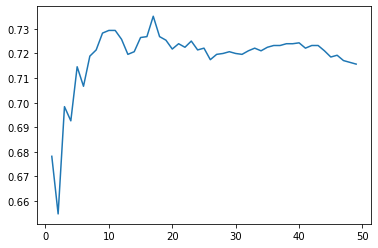

In [12]:
#Plotting the test data
plt.plot(range(1,50),scores)
plt.show()

In [13]:
max_score = max(scores)
scores.index(max_score)

16

In [14]:
#It's not much butter, but the optimal Value for K is 16 Let's Run Everything Again With K = 16
classifier = KNeighborsClassifier(n_neighbors = 16)
classifier.fit(train_data,train_labels)
print(classifier.score(test_data,test_labels))

0.7268468468468469


In [15]:
y_pred = classifier.predict(test_data)

In [16]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1378
           1       0.73      0.74      0.73      1397

    accuracy                           0.73      2775
   macro avg       0.73      0.73      0.73      2775
weighted avg       0.73      0.73      0.73      2775



In [17]:
cmat = confusion_matrix(test_labels, y_pred)
cmat

array([[ 988,  390],
       [ 368, 1029]], dtype=int64)